In [1]:
import sys
sys.path.append("../../helper")
from AnalysisHelper import helper

import pyupbit
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

In [2]:
print(pyupbit.get_tickers(fiat='KRW'))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-SSX', 'KRW-META', 'KRW-FCT2', 'KRW-CB

In [3]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])

{'KRW-BTC': 38453000.0, 'KRW-ETH': 2426000.0}

minute1, minute3, minute5, minute10, minute15, minute30, minute60, minute240, day, week, month	

open: 시가, high: 고가, low: 저가, close: 종가, 거래량: volume, 거래량을 원화로 환산한 가치: value

In [4]:
ticker = 'KRW-BTC'
interval = 'day'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
df = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
df.head()

,open,high,low,close,volume,value
2022-03-23 09:00:00,51689000.0,52232000.0,51118000.0,52138000.0,5293.402954,2.731582e+11
2022-03-24 09:00:00,52138000.0,53416000.0,51800000.0,52966000.0,7289.941854,3.827890e+11
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11


In [5]:
df['price'] = (df['high'] + df['low']) / 2
df.head()

,open,high,low,close,volume,value,price
2022-03-23 09:00:00,51689000.0,52232000.0,51118000.0,52138000.0,5293.402954,2.731582e+11,51675000.0
2022-03-24 09:00:00,52138000.0,53416000.0,51800000.0,52966000.0,7289.941854,3.827890e+11,52608000.0
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11,53575000.0
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11,53821500.0
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,54937500.0


In [6]:
helper.set_datetime_index(df, inplace=True)

### 데이터 검정

이상치는 보이지만 데이터 자체가 실제 거래 데이터이므로 정상 데이터로 판단함.

결측치 수: 0


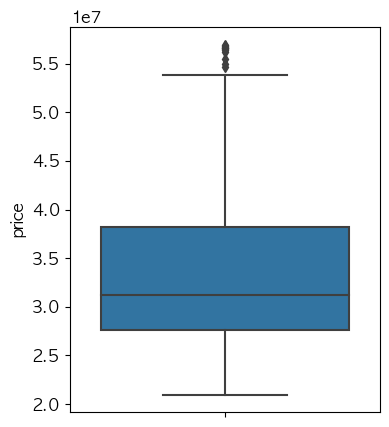

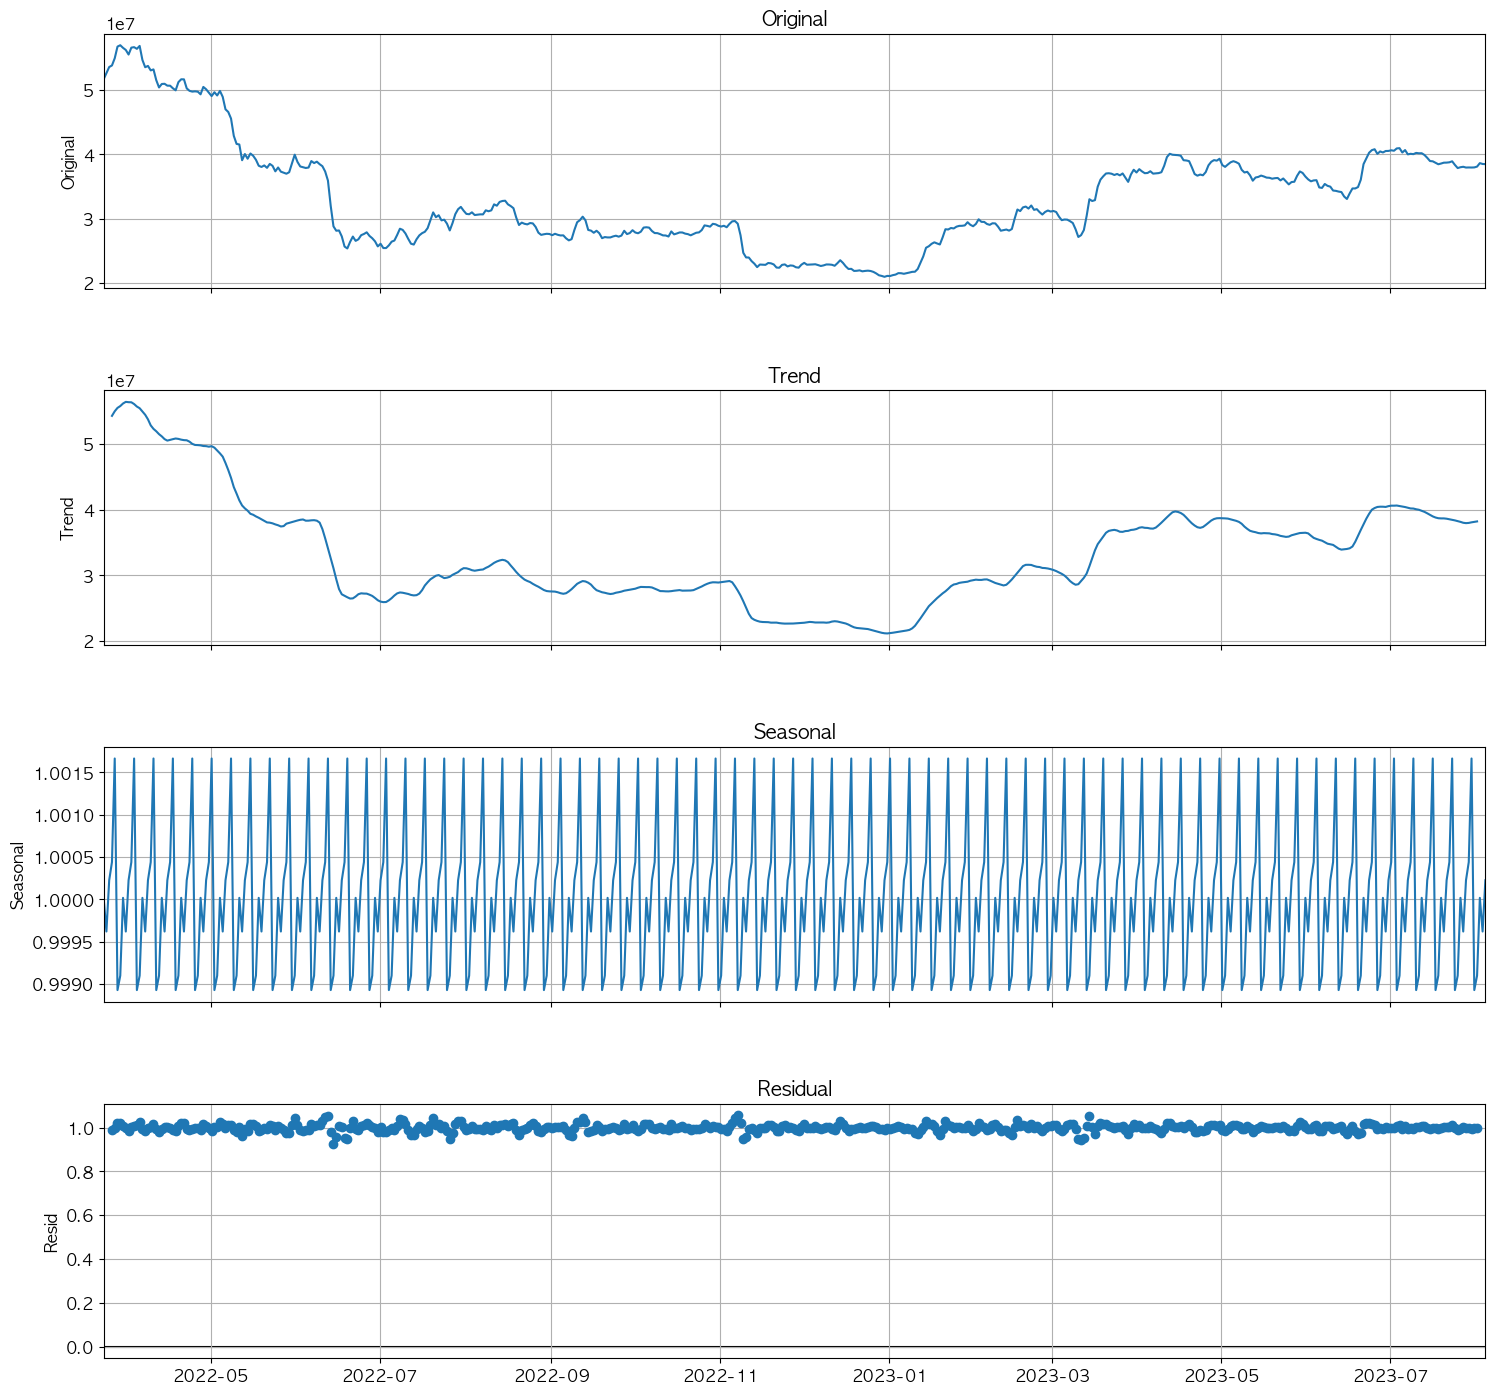

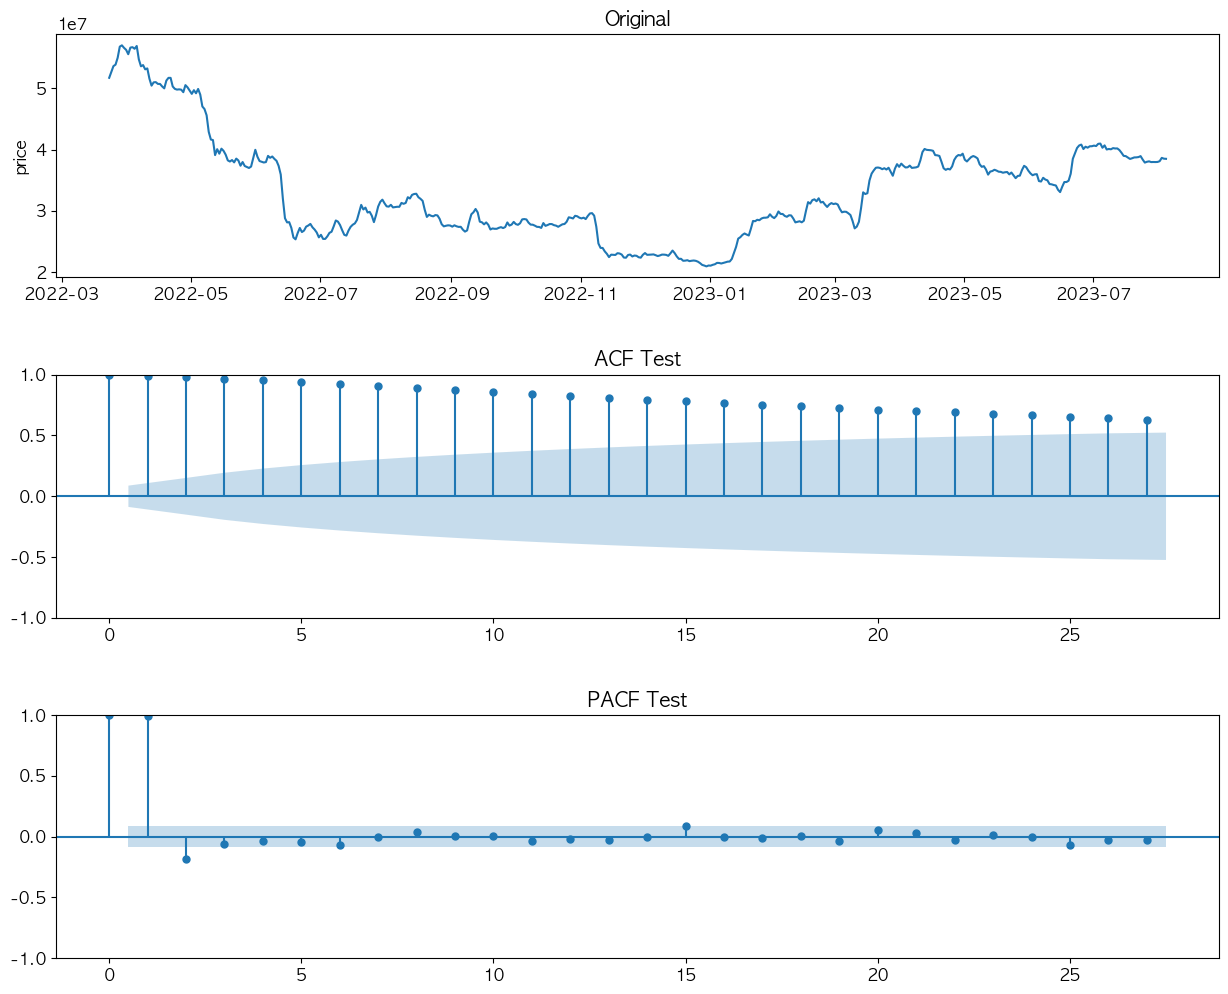

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          | -2.38614 |
| 유의수준(p-value)                  | 0.145686 |
| 최적차수(num of lags)              |        1 |
| 관측치 개수(num of observations)   |      498 |
| 기각값(Critical Values) 1%         | -3.44355 |
| 기각값(Critical Values) 5%         | -2.86736 |
| 기각값(Critical Values) 10%        | -2.56987 |
| 데이터 정상성 여부(0=Flase,1=True) |        0 |
+------------------------------------+----------+
=========== 1차 차분 데이터 ===========
+------------------------------------+-------------+
| ADF Test                           |             |
|------------------------------------+-------------|
| 검정통계량(ADF Statistic)          |    -10.0428 |
| 유의수준(p-value)                  | 1.48075e-17 |
| 최적차수(num of lags)              |           2 |
| 관측치 개수(num of observations)   |         496 |
| 기각값(Critical Va

In [7]:
helper.exp_time_data(df, 'price', "m", max_diff=10)

In [8]:
model = ARIMA(df['price'], order=(1,1,0), seasonal_order=(1,1,0,7))
#model = ARIMA(df['price'], order=(1,1,0))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           price   No. Observations:                  500
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7467.587
Date:                         Sat, 05 Aug 2023   AIC                          14941.175
Time:                                 22:48:32   BIC                          14953.770
Sample:                             03-23-2022   HQIC                         14946.120
                                  - 08-04-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0756      0.006     12.097      0.000       0.063       0.088
ar.S.L7       -0.0446      0.004    -11.931      0.000     

### 잔차 분석

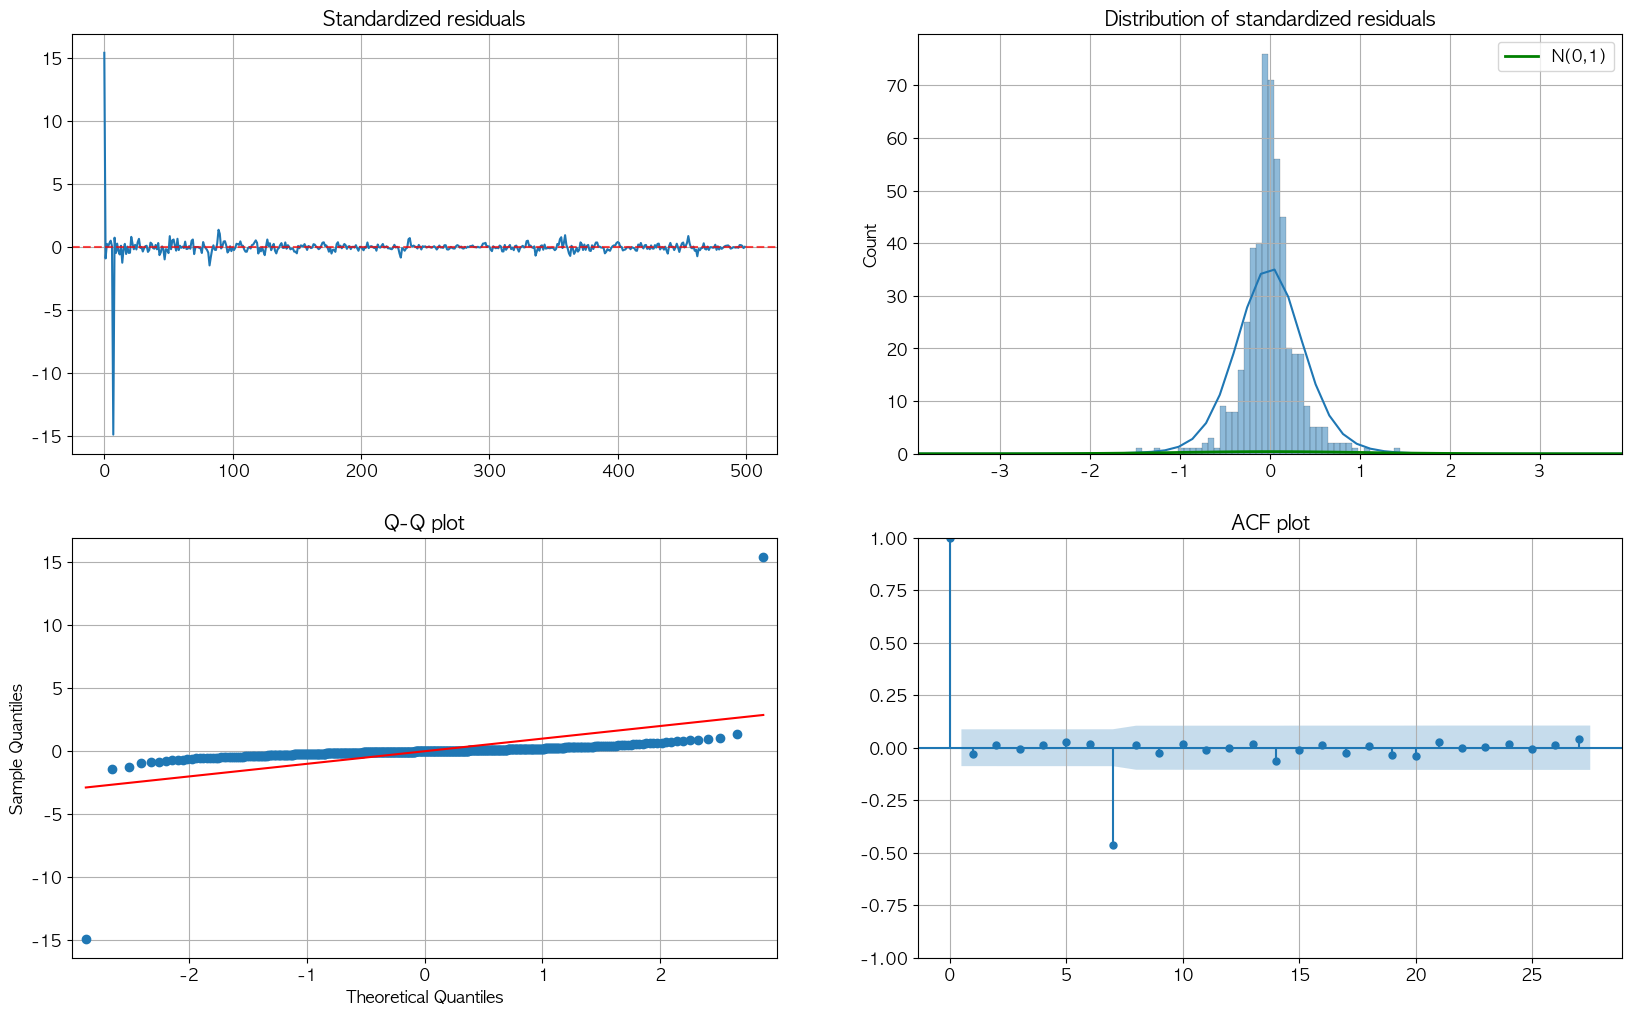

In [9]:
helper.arima_diagnostics(fit.resid)

In [10]:
fv = fit.fittedvalues
fv.head()

2022-03-23 09:00:00    0.000000e+00
2022-03-24 09:00:00    5.557963e+07
2022-03-25 09:00:00    5.267849e+07
2022-03-26 09:00:00    5.364799e+07
2022-03-27 09:00:00    5.383914e+07
Freq: D, dtype: float64

In [11]:
fc = fit.forecast(30)
fc.head()

2023-08-05 09:00:00    3.850413e+07
2023-08-06 09:00:00    3.850249e+07
2023-08-07 09:00:00    3.849269e+07
2023-08-08 09:00:00    3.859032e+07
2023-08-09 09:00:00    3.911150e+07
Freq: D, Name: predicted_mean, dtype: float64

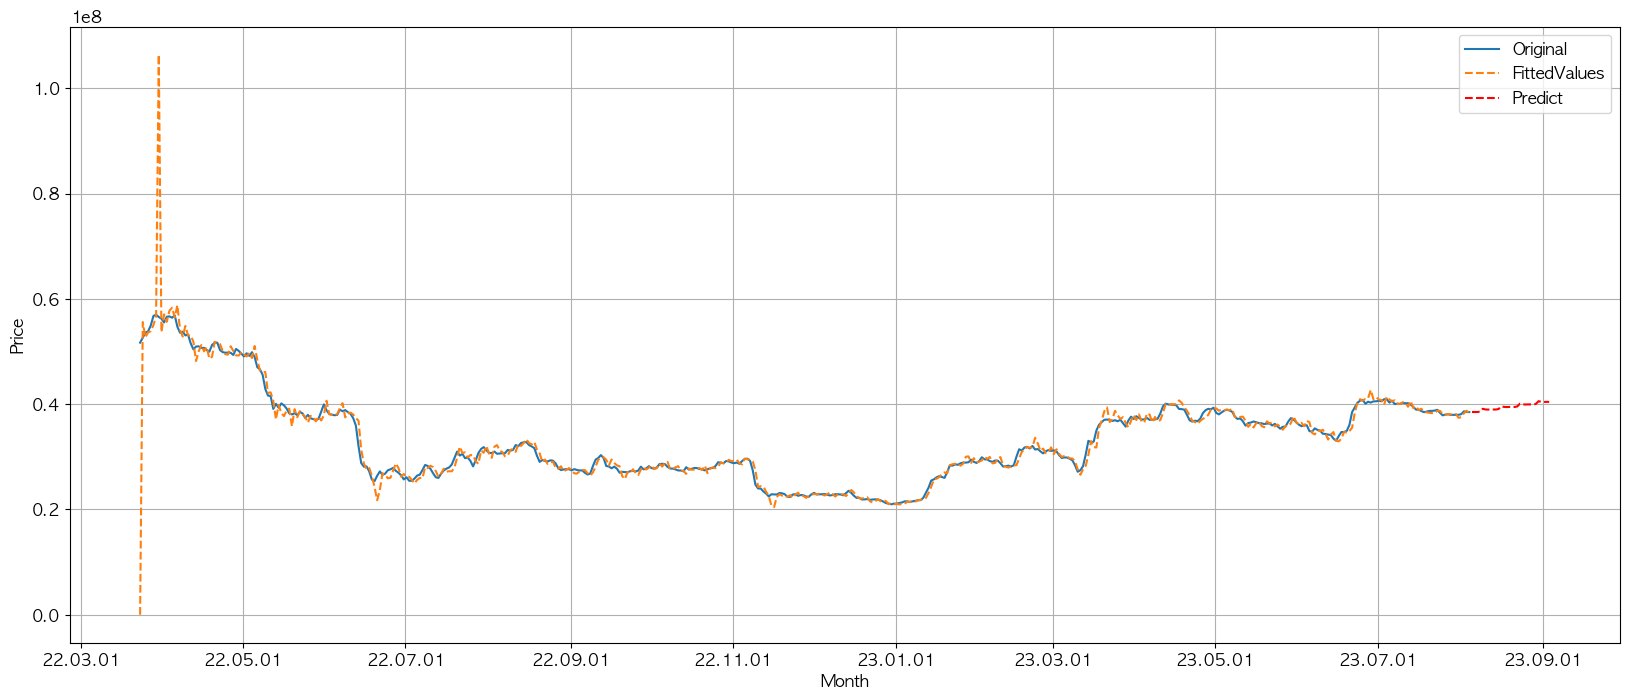

In [12]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [13]:
my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 1    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 7    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['price'],       # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14960.704, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14941.175, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14946.919, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=14979.490, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=14943.163, Time=0.08 sec

Best model:  ARIMA(1,1,0)(1,1,0)[7]          
Total fit time: 0.230 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7467.587
Date:                           Sat, 05 Aug 2023   AIC                          14941.175
Time:                                   22:48:33   BIC                          14953.770
Sample:                               03-23-2022   HQIC                         14946.120
     

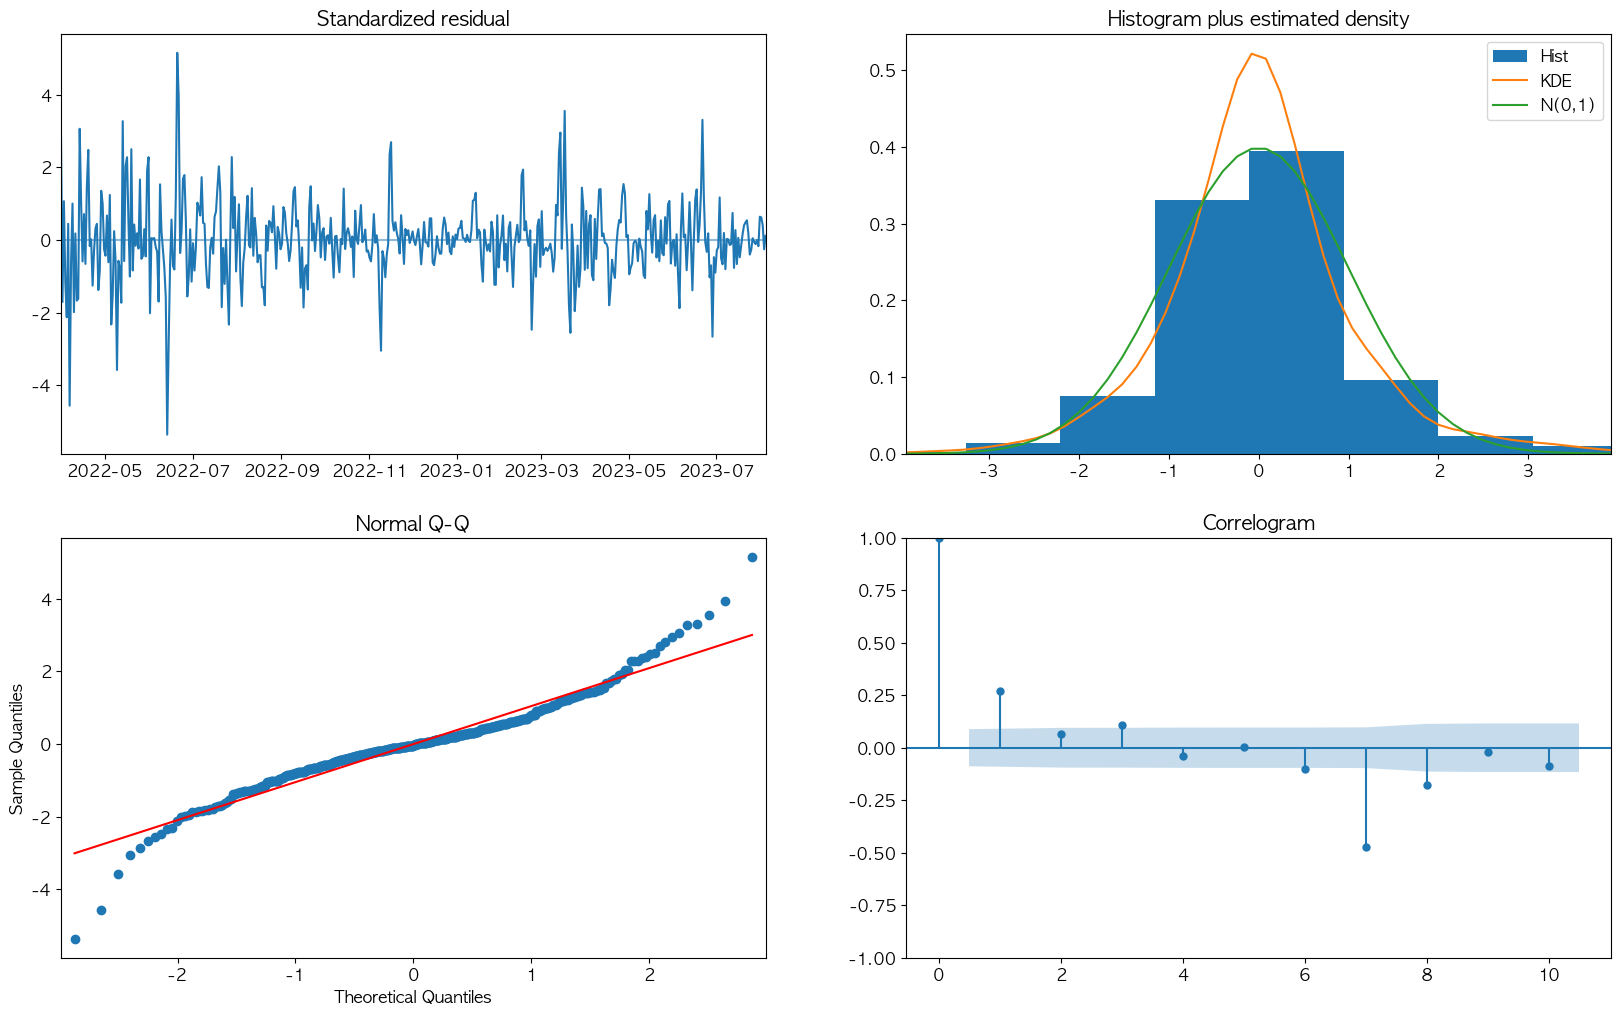

In [14]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()

In [15]:
fv = model.fittedvalues()
fv.head()

2022-03-23 09:00:00    0.000000e+00
2022-03-24 09:00:00    5.557963e+07
2022-03-25 09:00:00    5.267849e+07
2022-03-26 09:00:00    5.364799e+07
2022-03-27 09:00:00    5.383914e+07
Freq: D, dtype: float64

In [16]:
fc = model.predict(n_periods=30)
fc.head()

2023-08-05 09:00:00    3.850413e+07
2023-08-06 09:00:00    3.850249e+07
2023-08-07 09:00:00    3.849269e+07
2023-08-08 09:00:00    3.859032e+07
2023-08-09 09:00:00    3.911150e+07
Freq: D, dtype: float64

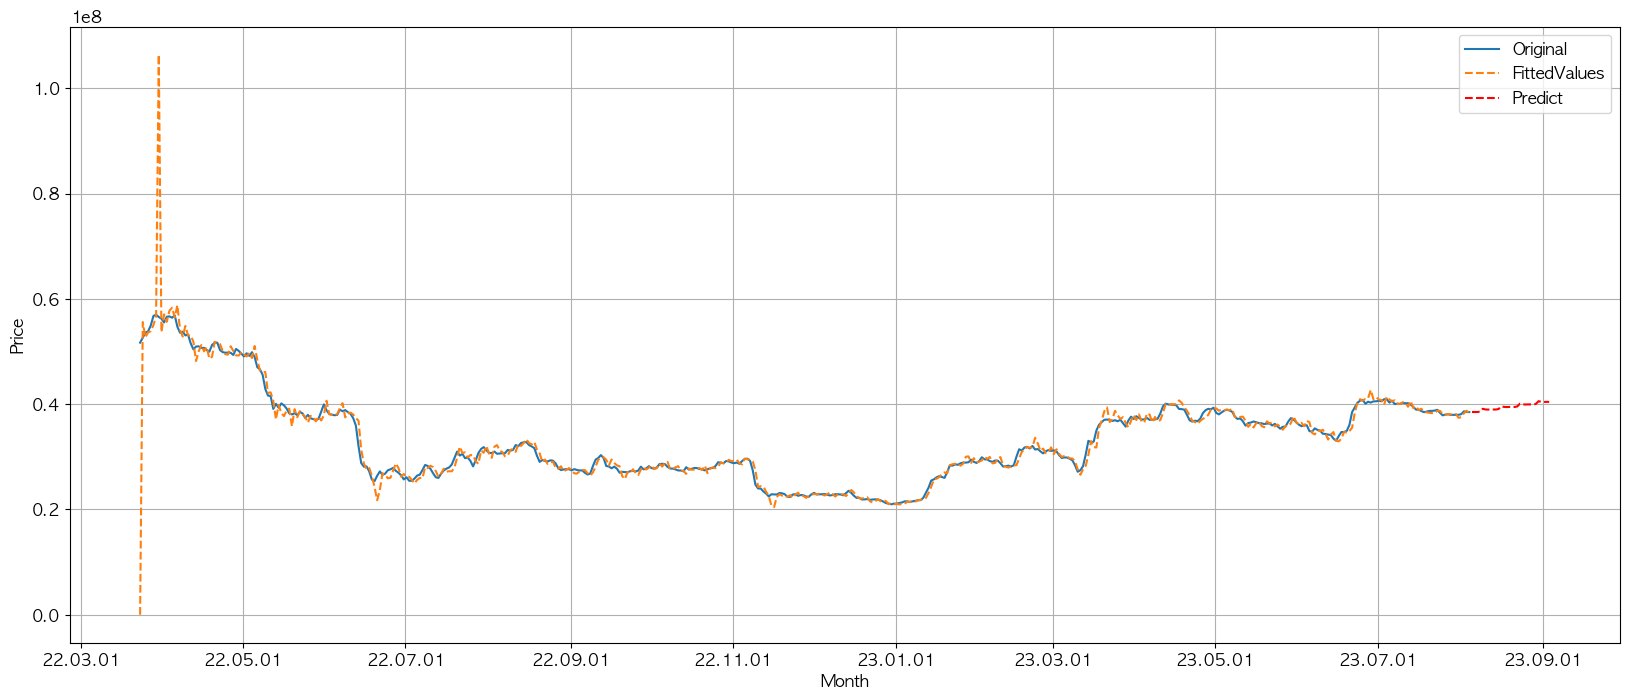

In [17]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()